In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [2]:
from utils.Dataset import Dataset
import numpy as np
import pandas as pd

In [3]:
# #Full dump
# dataset = Dataset(lateralize=False, reduced=False)
# dataset.preload_cache()
# dataset.save_dump()

In [4]:
# #Reduced dump
# dataset_reduced = Dataset(lateralize=False, reduced=True, n=500)
# dataset_reduced.preload_cache()
# dataset_reduced.save_dump("dump_cache_reduced.npz")


In [5]:
# import sys
# is_colab = 'google.colab' in sys.modules

In [6]:
# print("is_colab: ",is_colab)

In [7]:
# dataset_reduced_half = Dataset(lateralize=False, reduced=True, n=5000)
# dataset_reduced_half.preload_cache()
# dataset_reduced_half.save_dump("dump_cache_reduced_quart.npz")

In [8]:
# dataset_reduced_half.stats()

In [9]:
# #Reduced dump
# dataset_full = Dataset()
# dataset_full.preload_cache()
# dataset_full.save_dump("dump_cache_full.npz")

# Dataset balanced with Findings and No Findings in equal proportion

In [10]:
ds =  Dataset(lateralize=True)
ds

Flip BBoxes: 100%|██████████| 20486/20486 [00:06<00:00, 3122.67it/s]


,laterality,view,breast_birads,finding_categories,finding_birads,split,xmin,ymin,xmax,ymax,path,findings
0,R,CC,4,[Mass],4,training,302.404100,985.773942,426.304376,1078.419728,utils/images_original/48575a27b7c992427041a82f...,1
1,R,MLO,4,[Mass],4,training,272.577325,743.812744,379.600308,812.095390,utils/images_original/48575a27b7c992427041a82f...,1
2,R,CC,3,[Global Asymmetry],3,training,95.480663,499.060222,543.847286,1287.129503,utils/images_original/75e8e48933289d70b407379a...,1
3,R,MLO,3,[Global Asymmetry],3,training,182.970548,726.730749,749.507079,1105.680056,utils/images_original/75e8e48933289d70b407379a...,1
4,R,CC,4,[Architectural Distortion],4,training,331.732896,1078.254802,508.417507,1203.183844,utils/images_original/c3487424fee1bdd4515b72dc...,1
...,...,...,...,...,...,...,...,...,...,...,...,...
20481,R,CC,2,[No Finding],<NA>,training,NaN,NaN,NaN,NaN,utils/images_original/f2093a752e6b44df5990f5fd...,0
20482,R,CC,2,[No Finding],<NA>,training,NaN,NaN,NaN,NaN,utils/images_original/b3c8969cd2accfa4dbb2aece...,0
20483,L,CC,2,[No Finding],<NA>,training,NaN,NaN,NaN,NaN,utils/images_original/b3c8969cd2accfa4dbb2aece...,0
20484,R,MLO,2,[No Finding],<NA>,training,NaN,NaN,NaN,NaN,utils/images_original/b3c8969cd2accfa4dbb2aece...,0


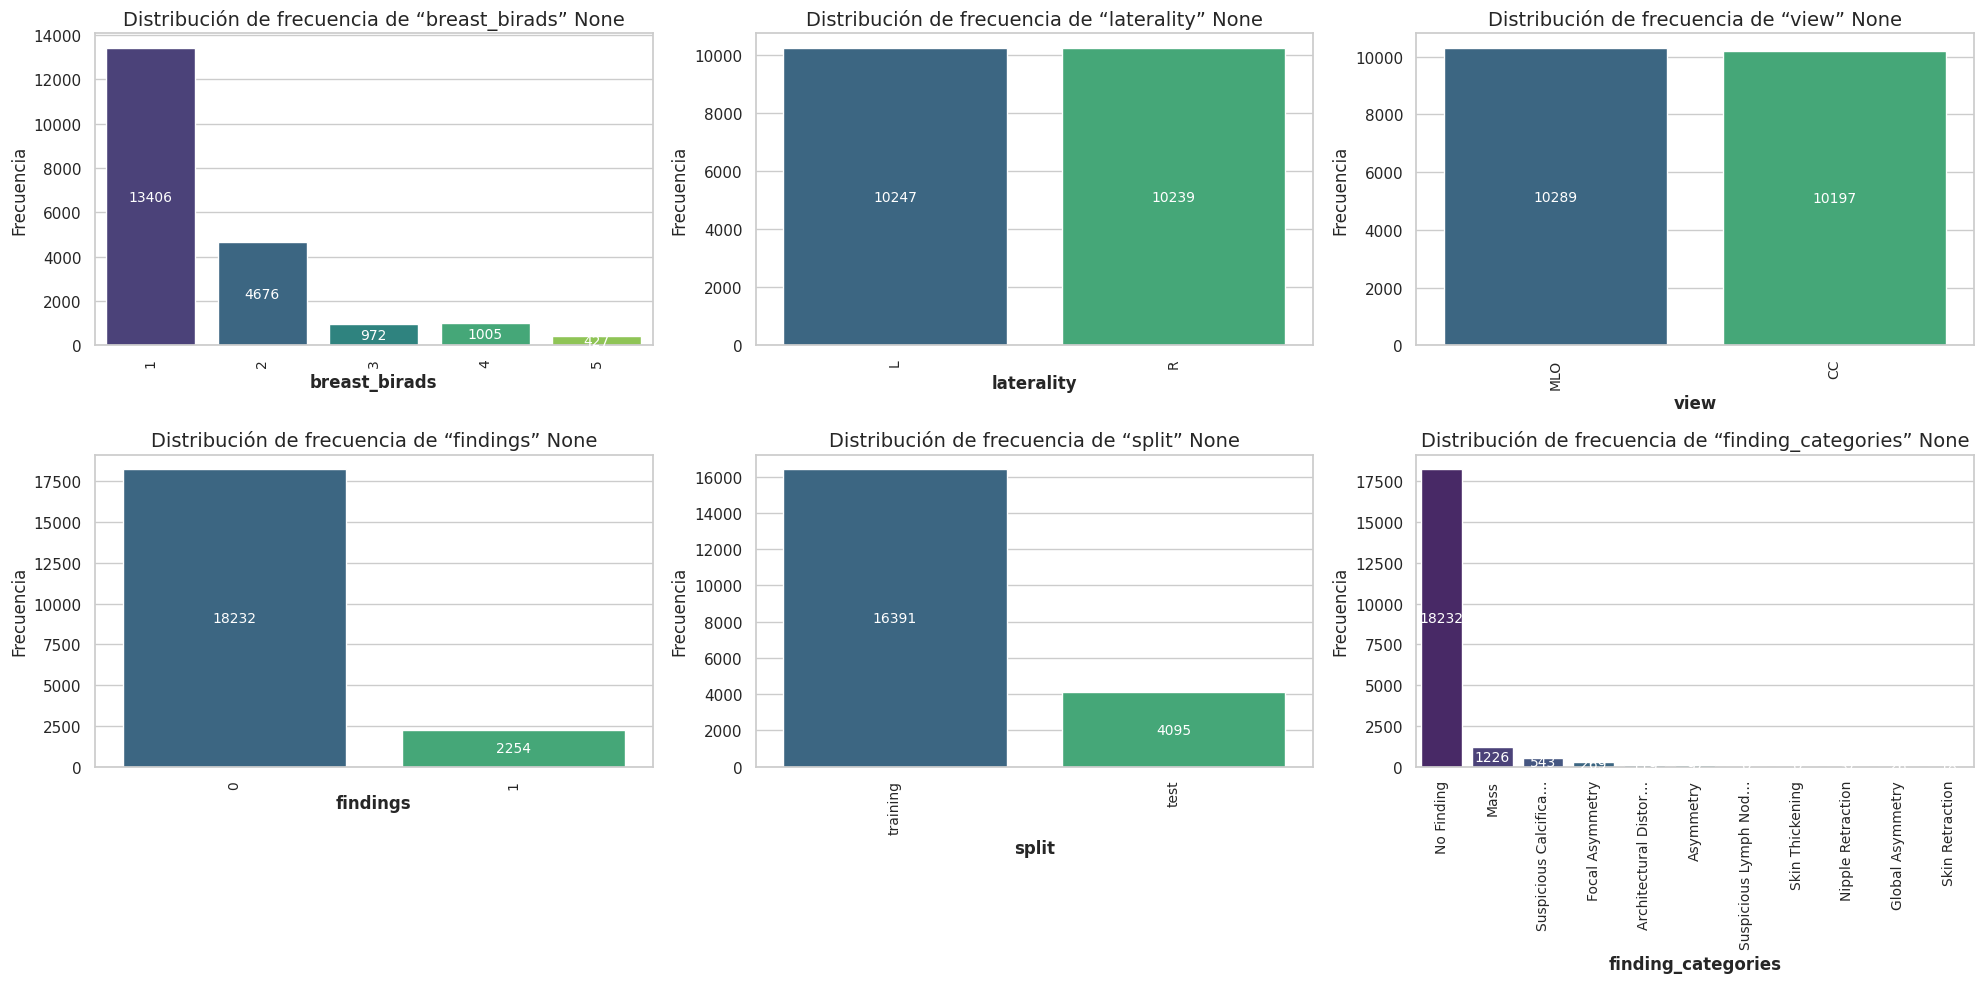

In [11]:
ds.stats()

In [12]:
exploded = ds.explode("finding_categories")
ct = pd.crosstab(index=exploded["finding_categories"], columns="count")
ct = ct.sort_values("count", ascending=False)
print(ct)

col_0                     count
finding_categories             
No Finding                18232
Mass                       1226
Suspicious Calcification    543
Focal Asymmetry             269
Architectural Distortion    119
Asymmetry                    97
Skin Thickening              57
Suspicious Lymph Node        57
Nipple Retraction            37
Global Asymmetry             26
Skin Retraction              18


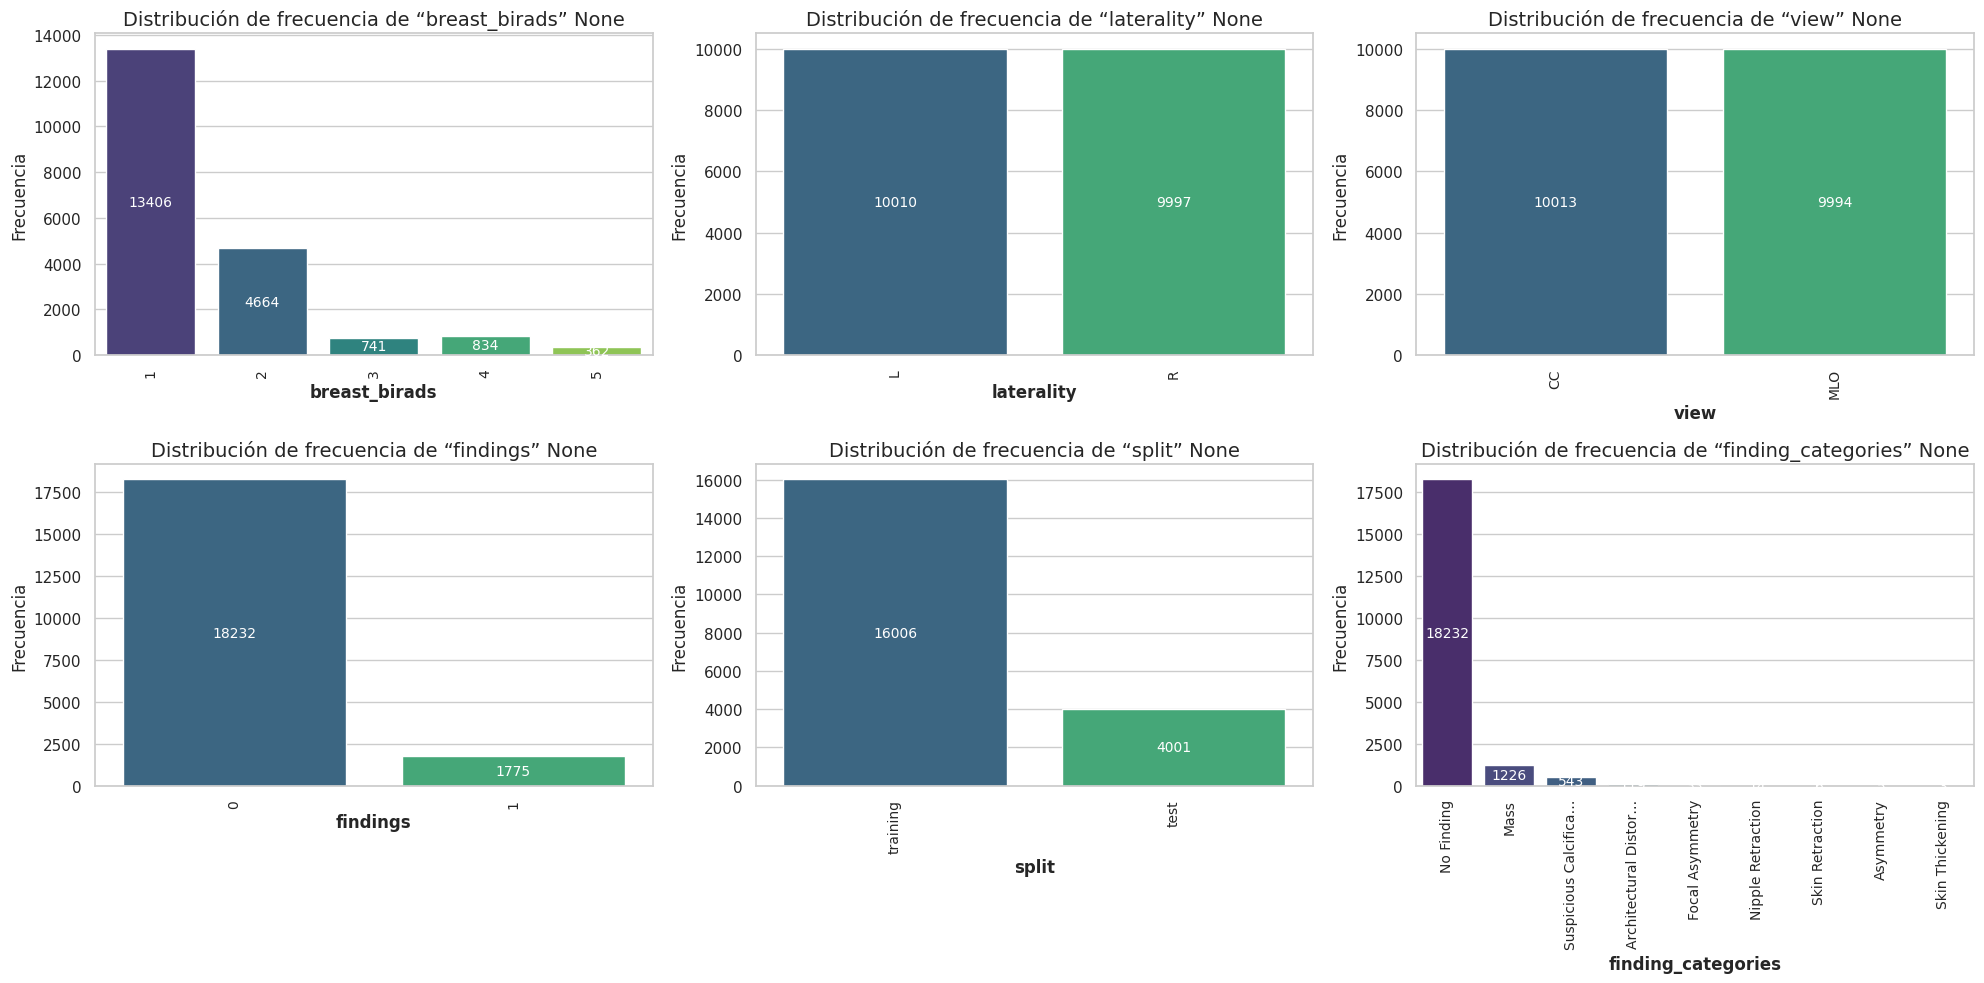

In [13]:
values = {'Mass', 'Suspicious Calcification', 'Architectural Distortion', 'No Finding'}
ds_clean = ds[
    (ds["finding_categories"].apply(lambda l: any(v in l for v in values)))
]
ds_clean.stats()

In [14]:
exploded = ds_clean.explode("finding_categories")
ct = pd.crosstab(index=exploded["finding_categories"], columns="count")
ct = ct.sort_values("count", ascending=False)
print(ct)

col_0                     count
finding_categories             
No Finding                18232
Mass                       1226
Suspicious Calcification    543
Architectural Distortion    119
Focal Asymmetry              33
Nipple Retraction            14
Skin Retraction               6
Asymmetry                     5
Skin Thickening               3


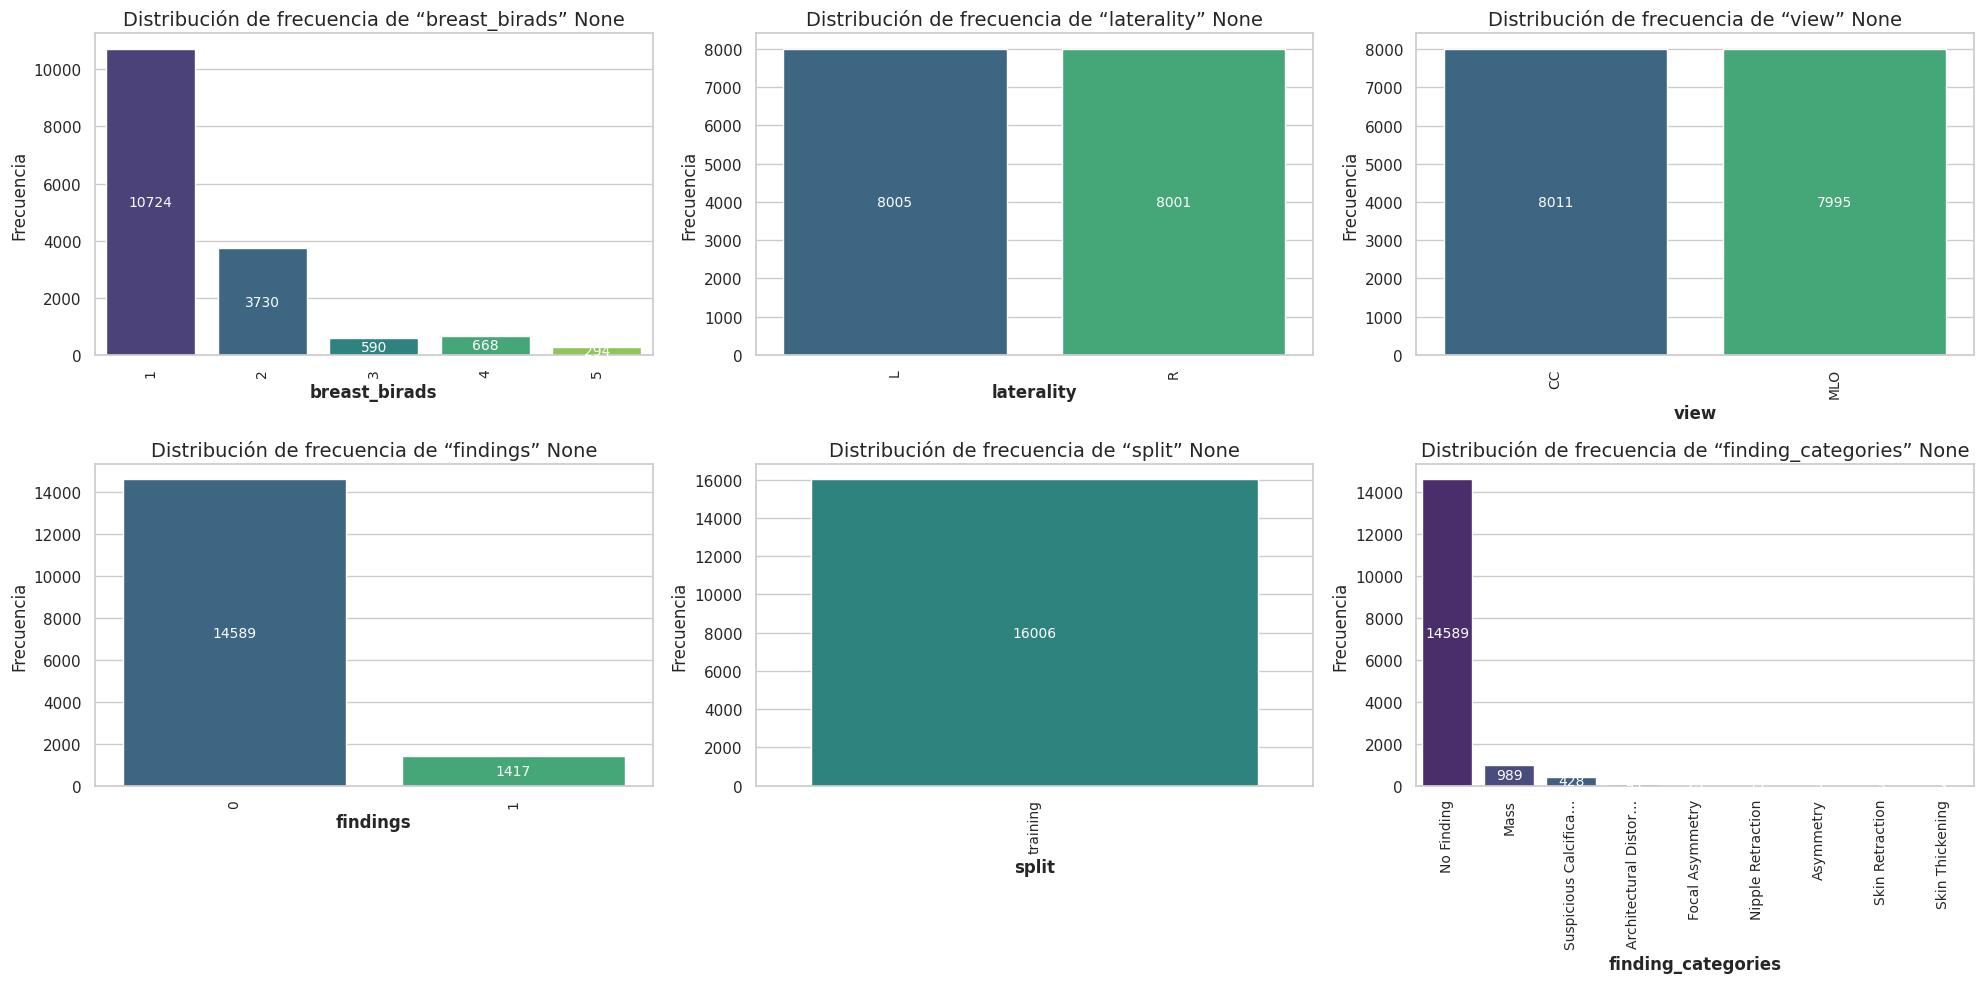

In [15]:
ds_clean_train = ds_clean[ds_clean["split"]=="training"]
ds_clean_train.stats()

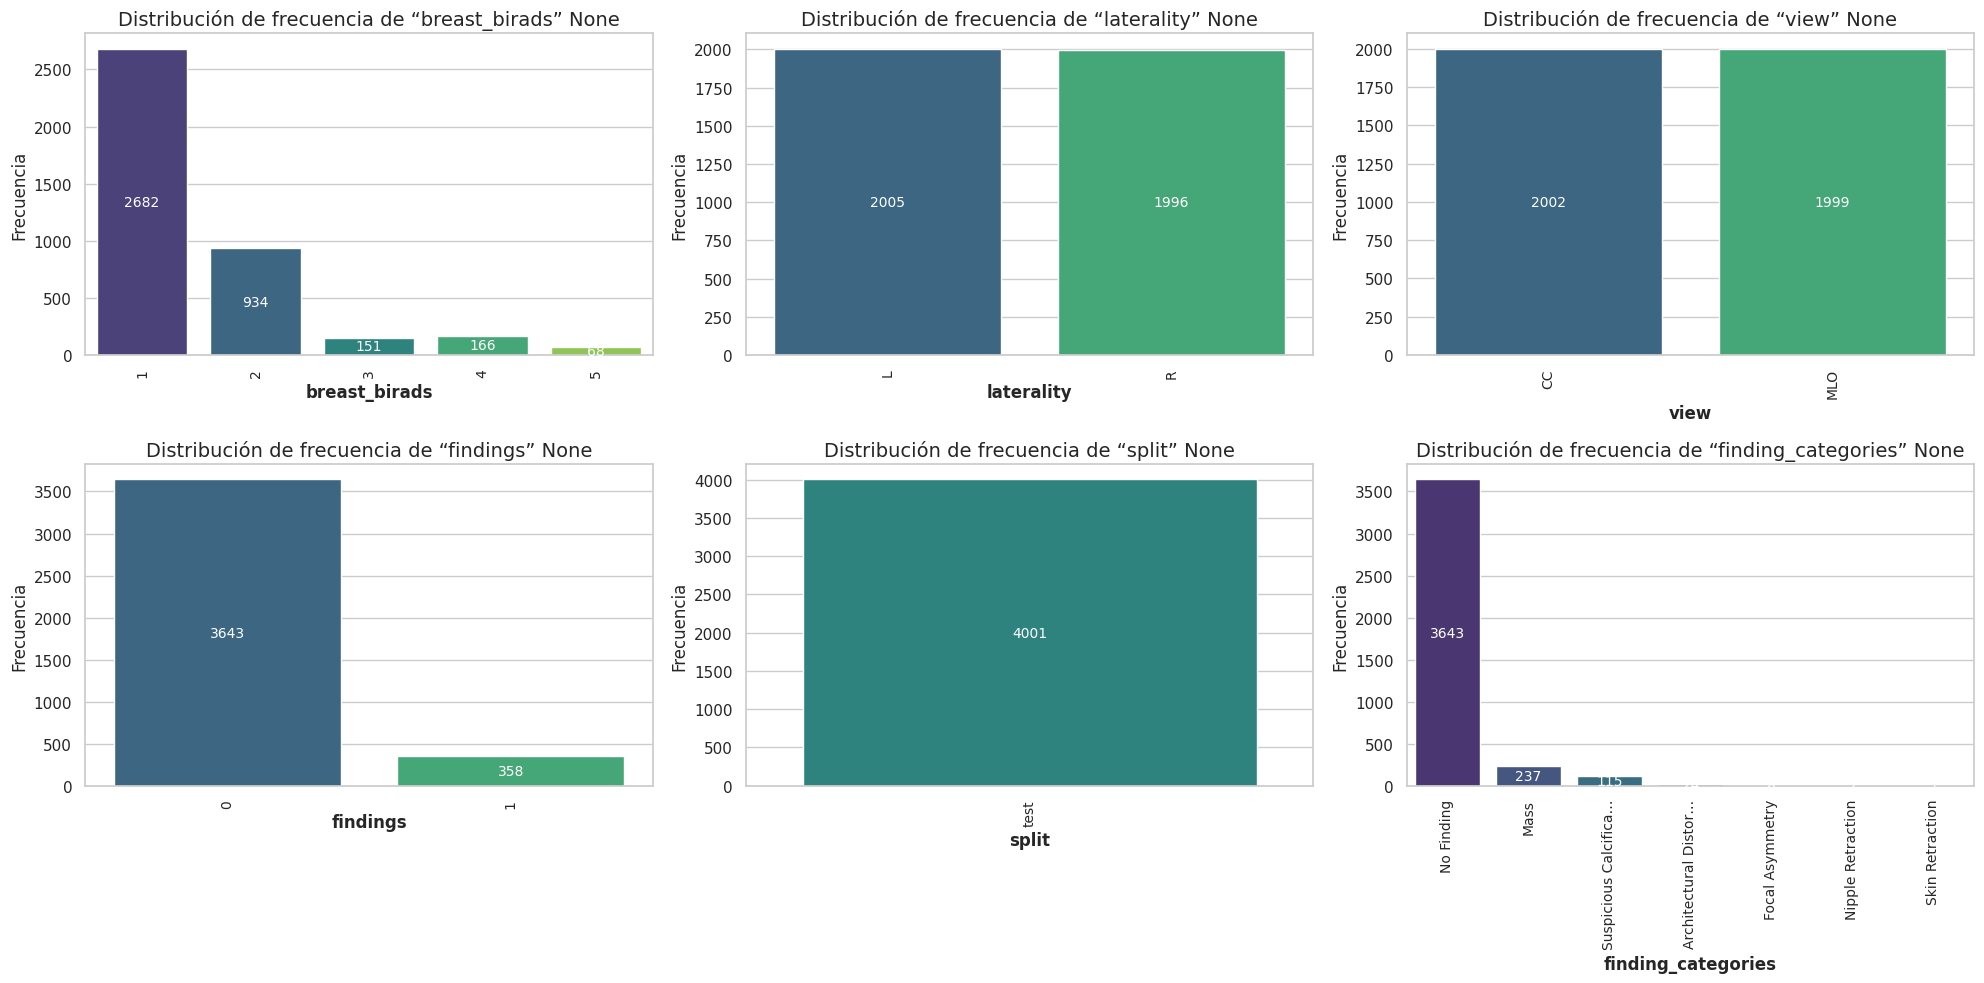

In [16]:
ds_clean_test = ds_clean[ds_clean["split"]=="test"]
ds_clean_test.stats()

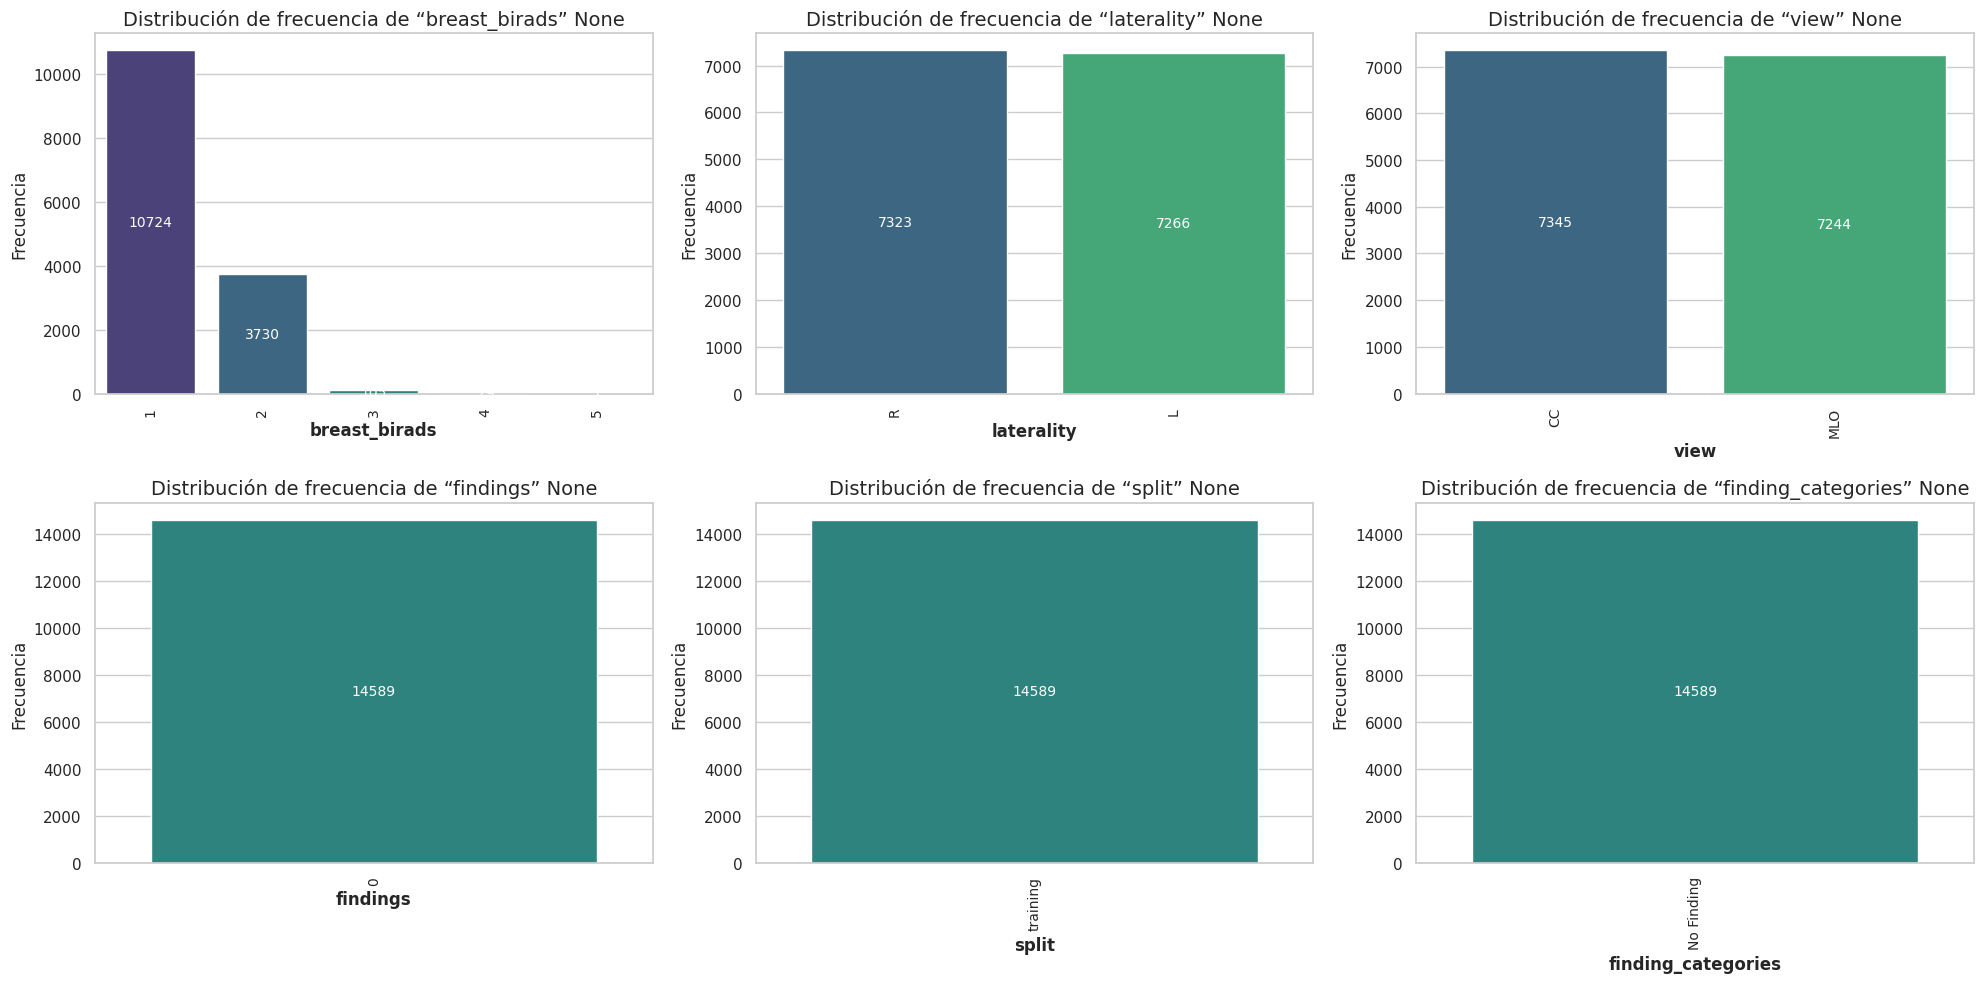

In [17]:
ds_clean_train_0 = ds_clean_train[ds_clean_train["findings"]==0] 
ds_clean_train_0.stats()

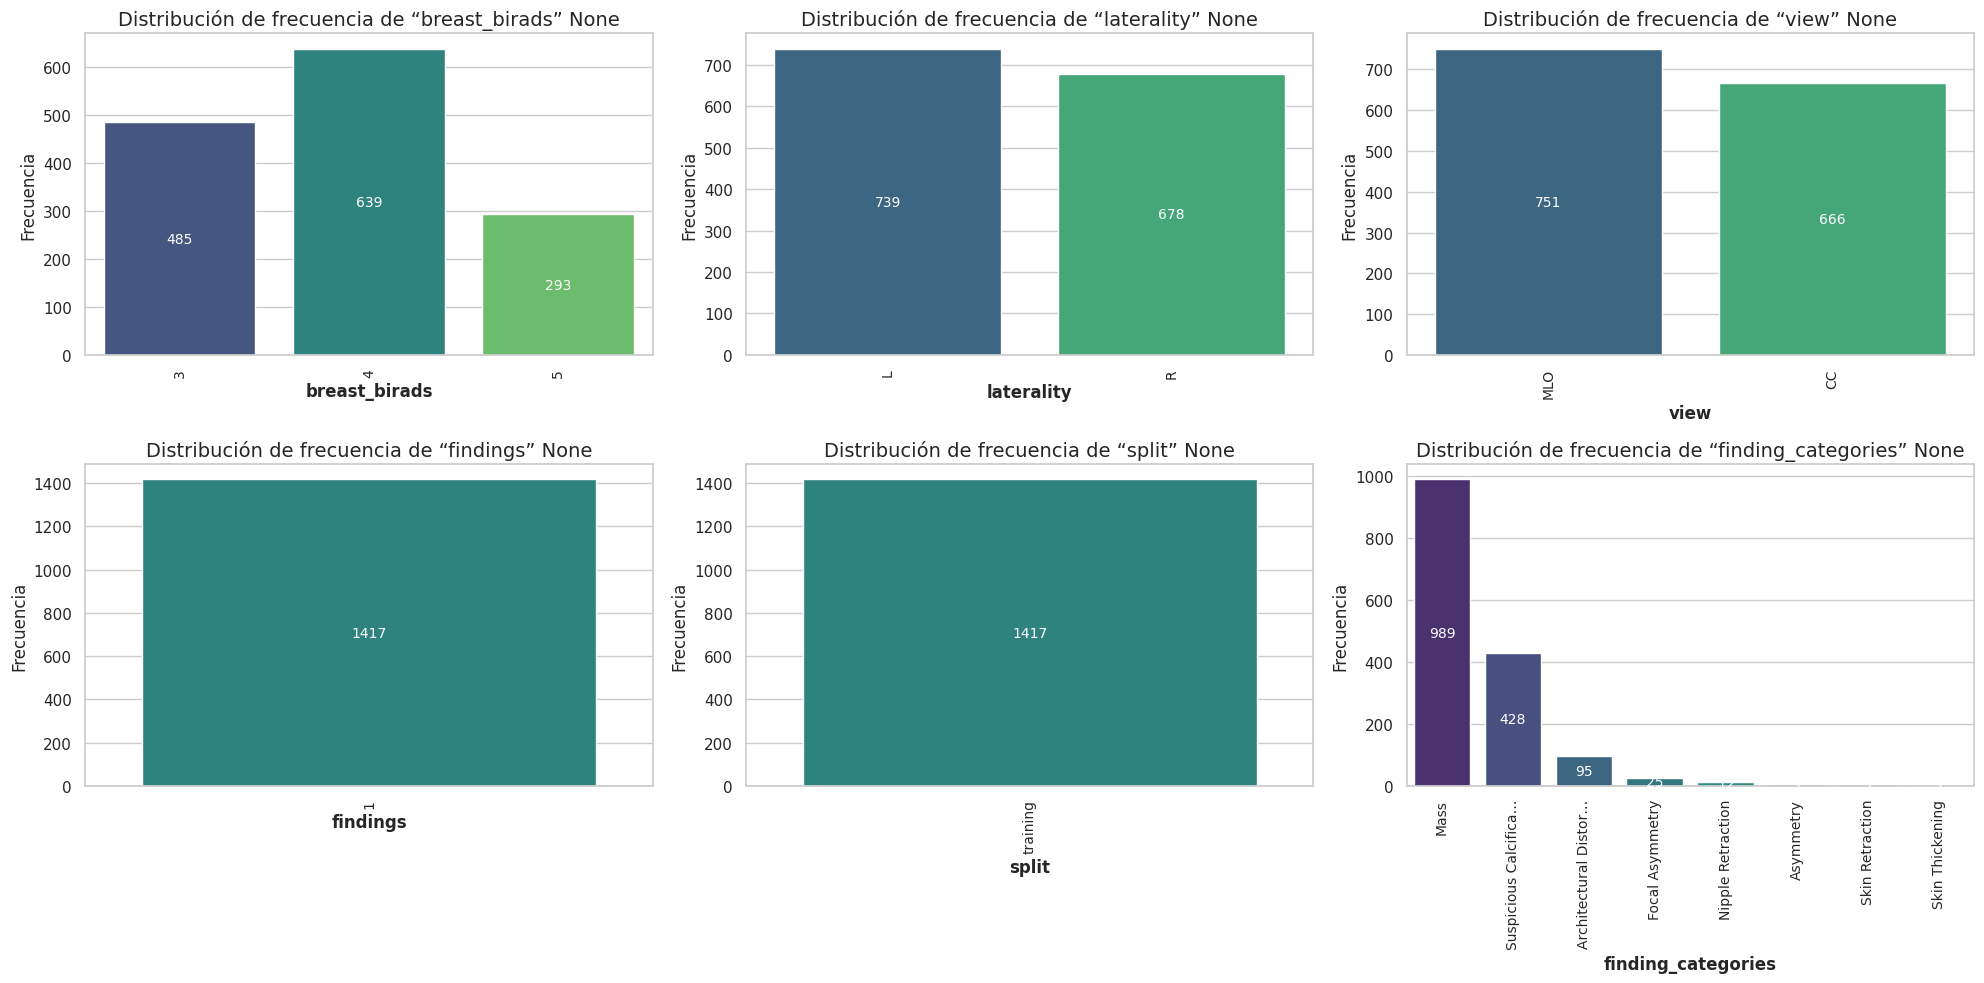

In [18]:
ds_clean_train_1 = ds_clean_train[ds_clean_train["findings"]==1] 
ds_clean_train_1.stats()

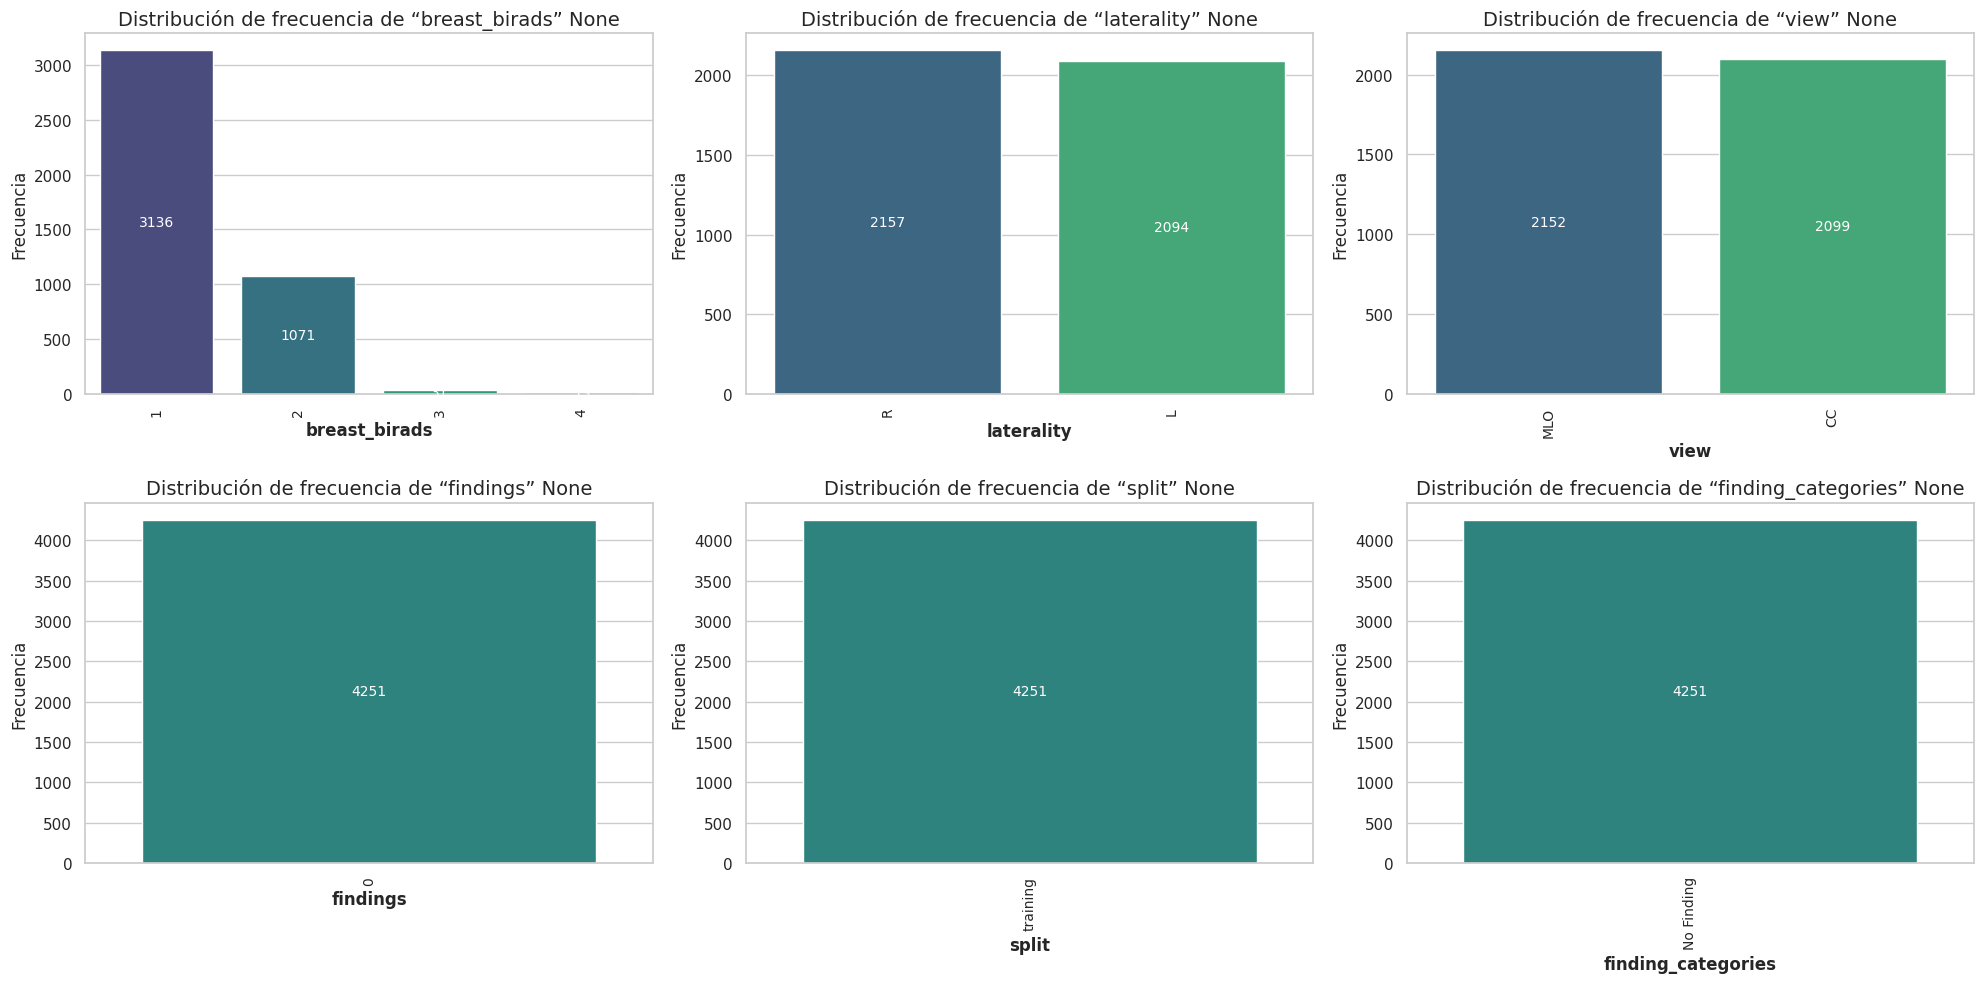

In [19]:
ds_clean_train_1_n = len(ds_clean_train_1)
ds_clean_train_0_sample = ds_clean_train_0.sample(n=3*ds_clean_train_1_n, random_state=42)
ds_clean_train_0_sample.stats()

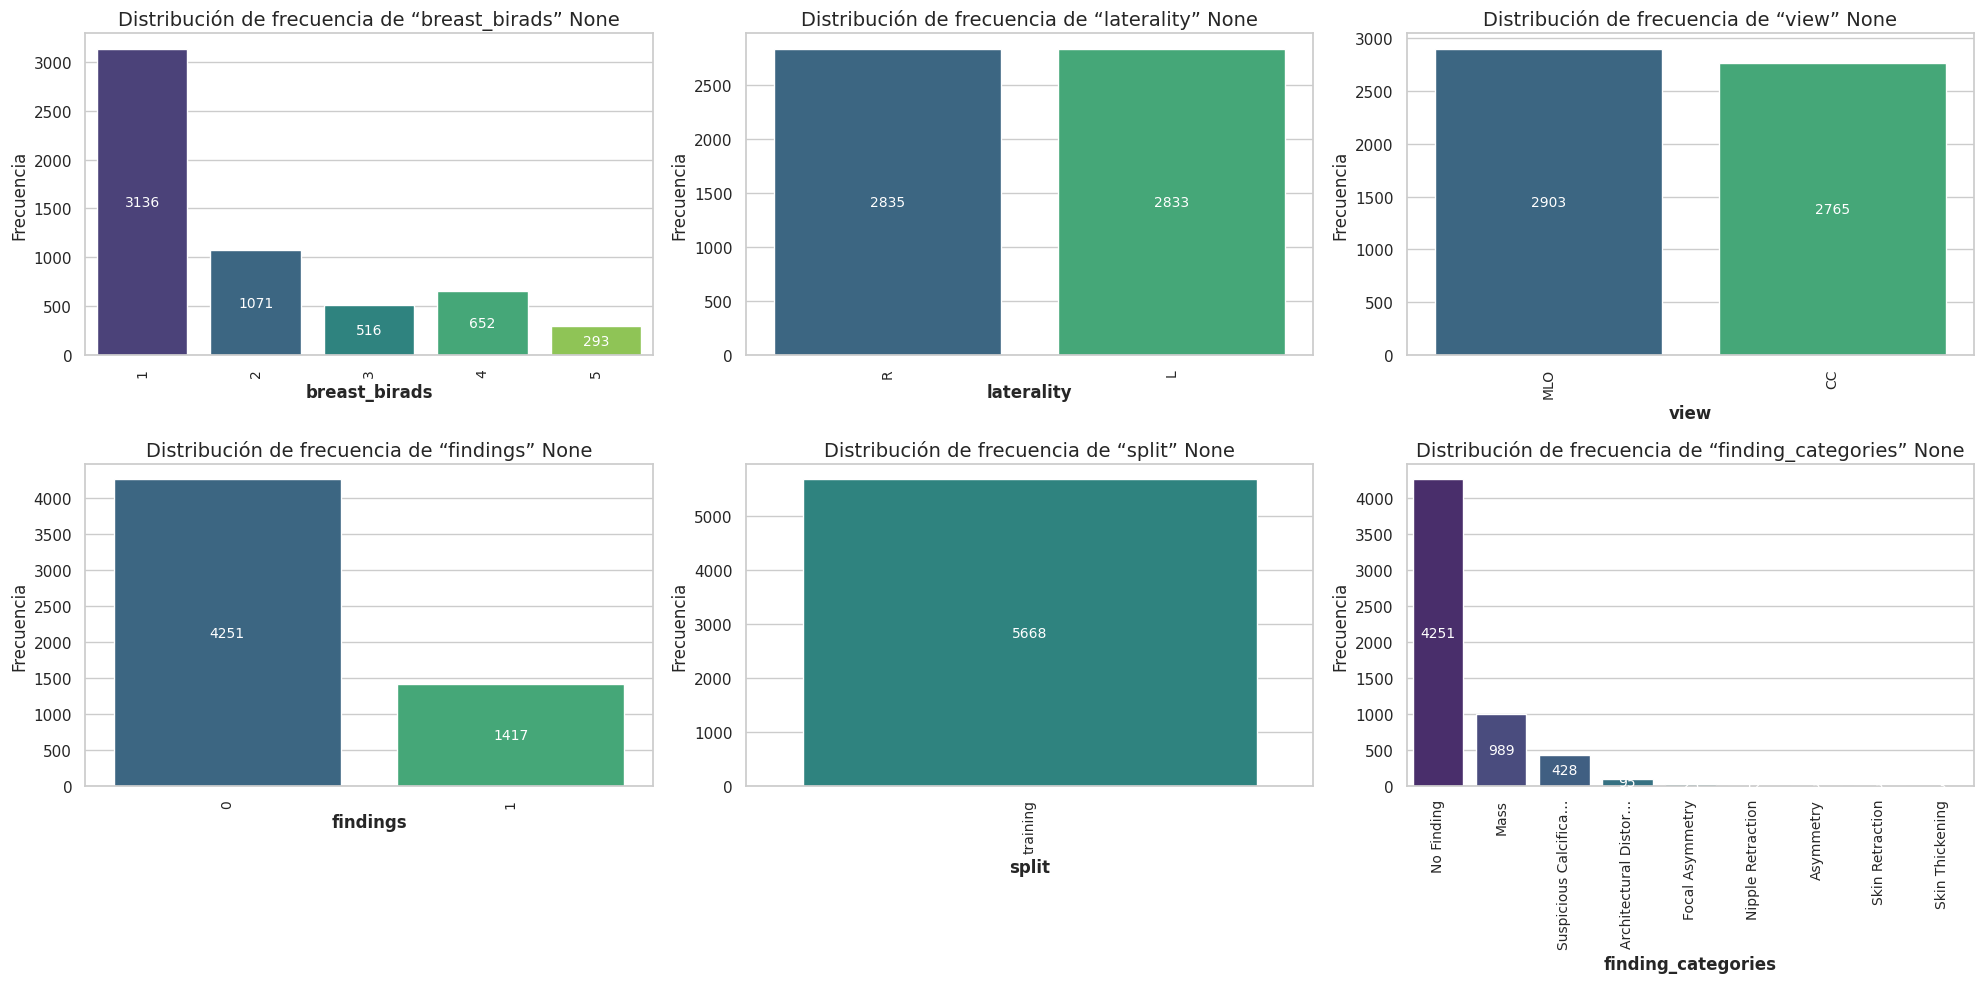

In [20]:
ds_train_ready = pd.concat([ds_clean_train_1, ds_clean_train_0_sample], ignore_index=True)
ds_train_ready.stats()

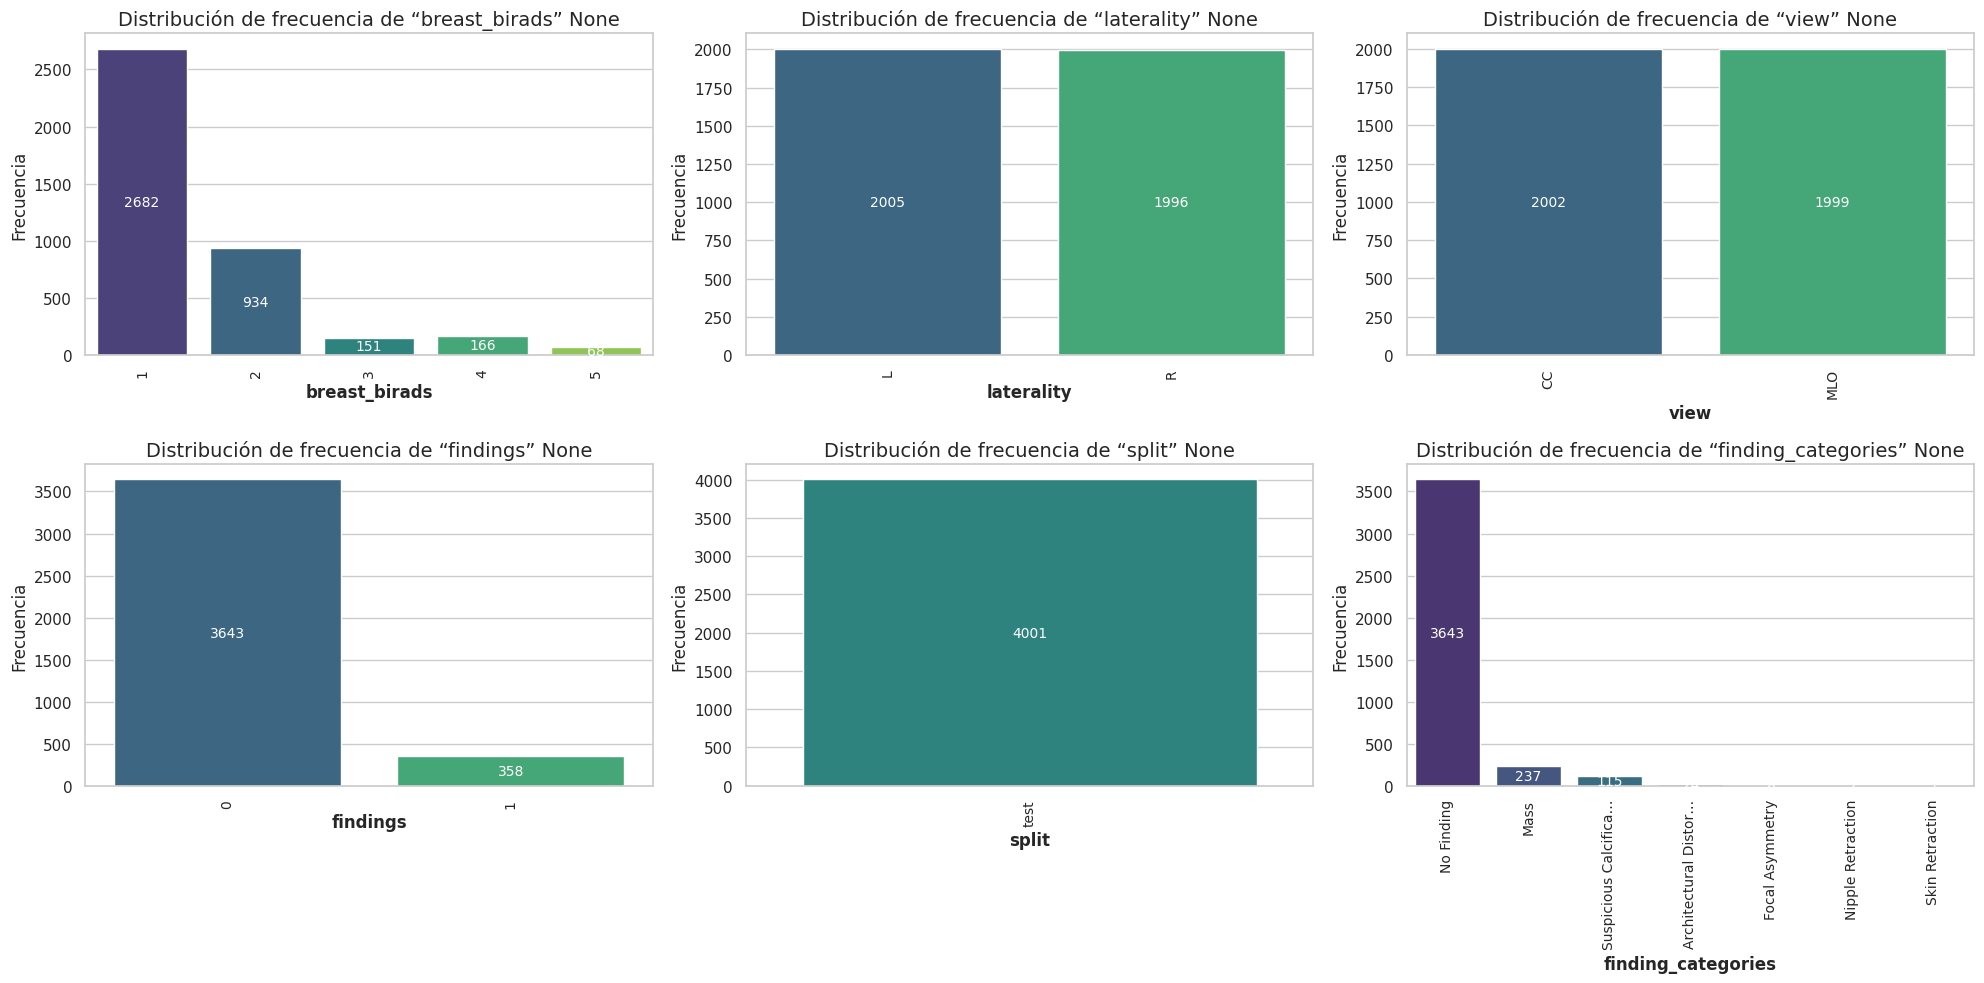

In [21]:
ds_clean_test = ds_clean[ds_clean["split"]=="test"]
ds_clean_test.stats()

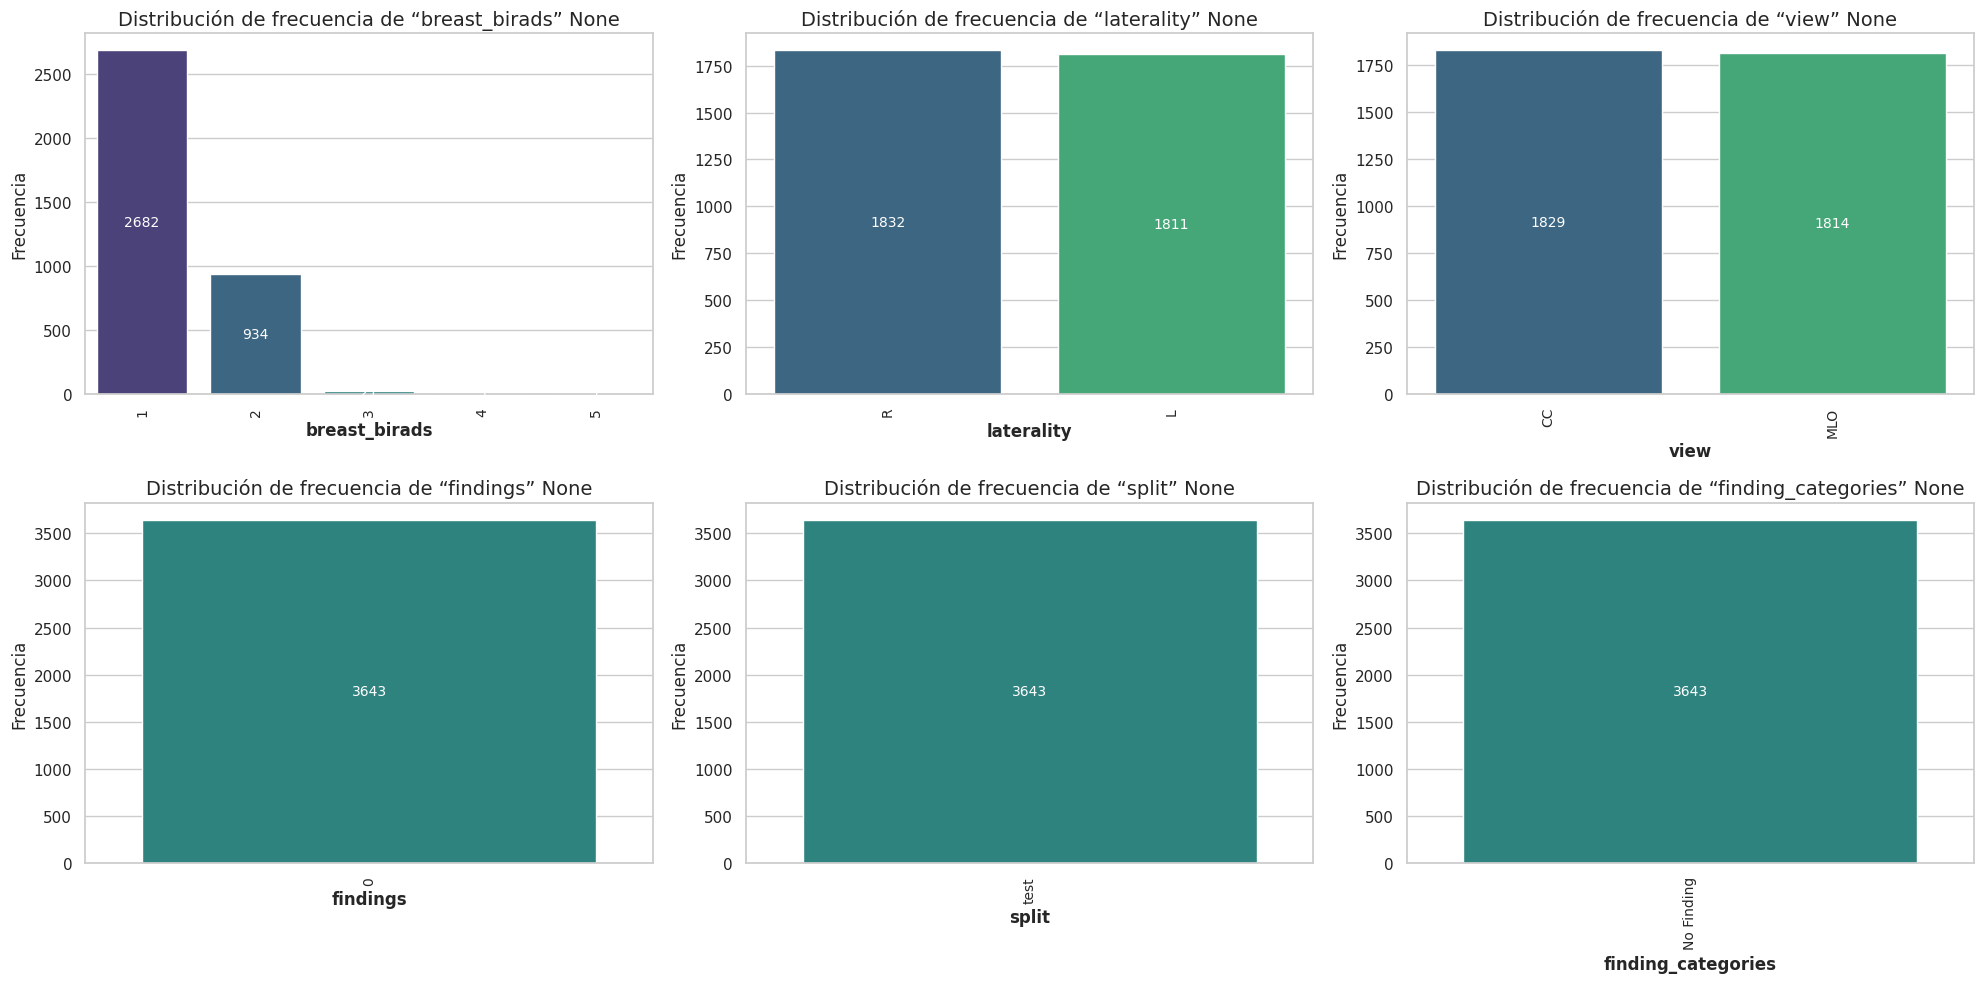

In [22]:
ds_clean_test_0 = ds_clean_test[ds_clean_test["findings"]==0] 
ds_clean_test_0.stats()

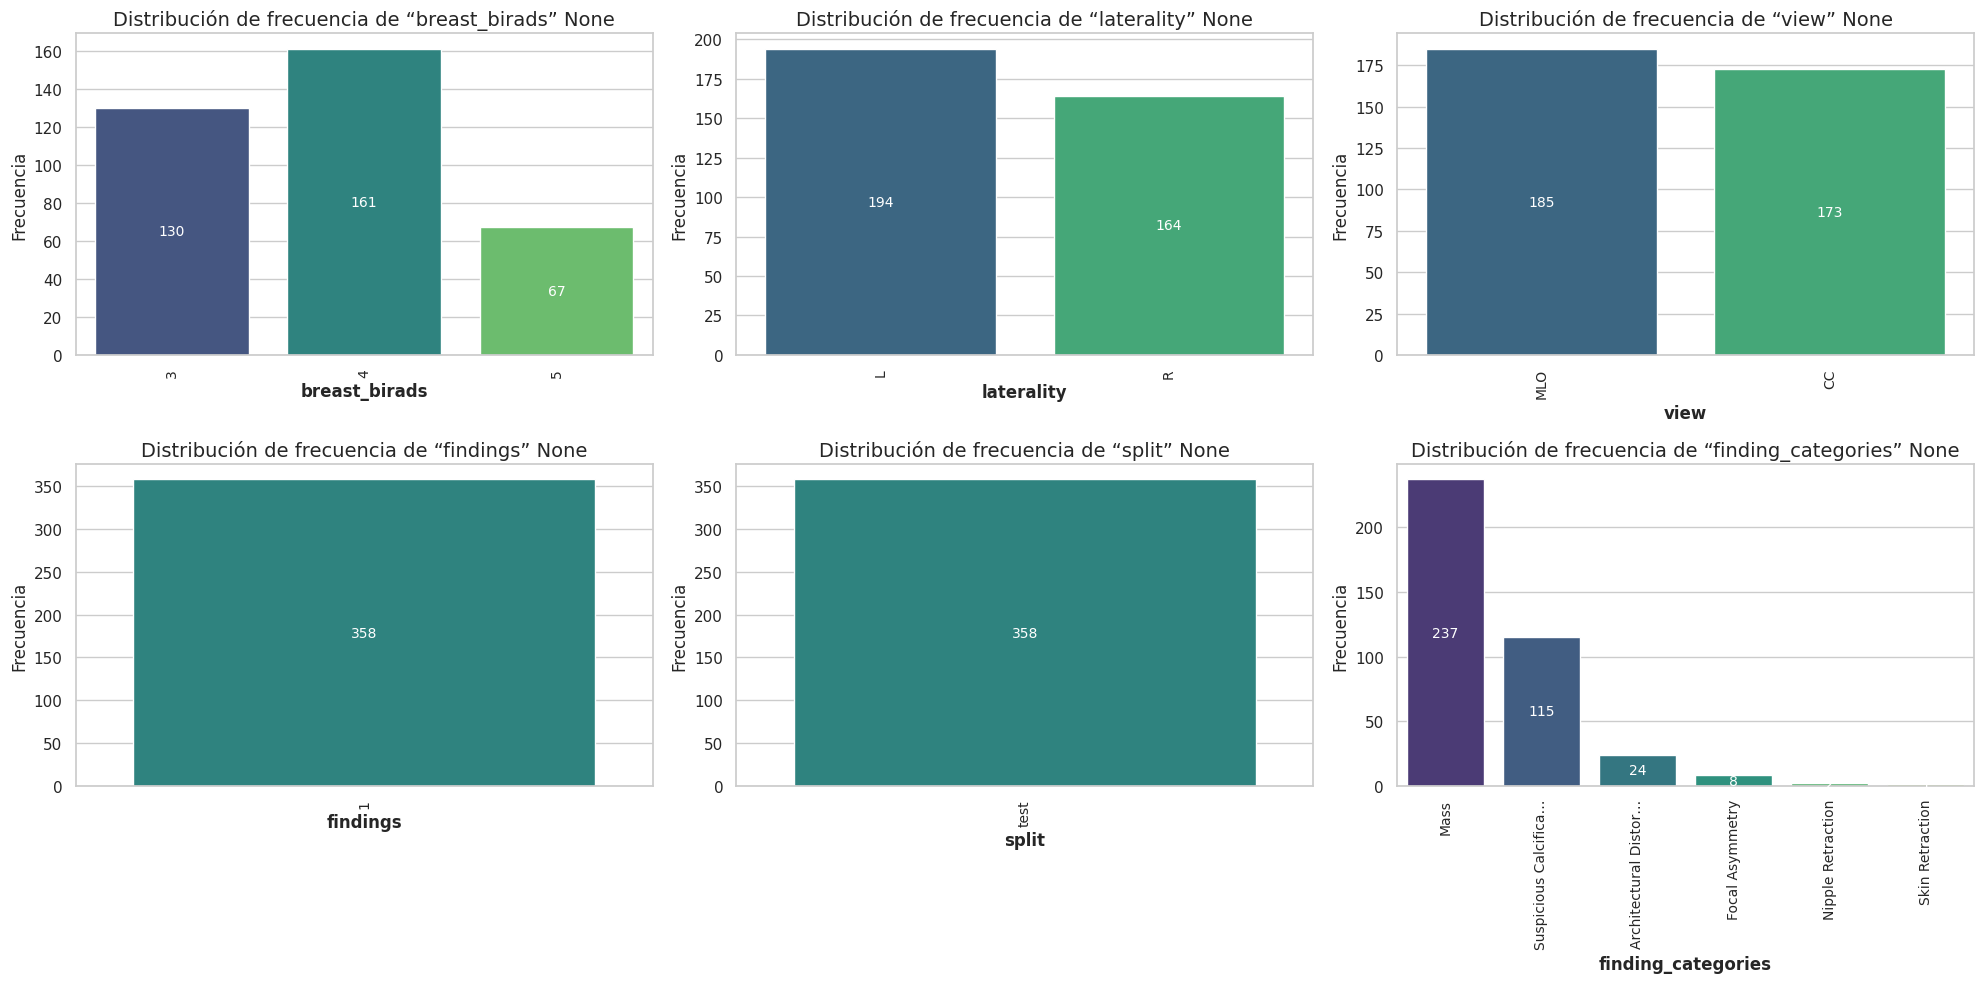

In [23]:
ds_clean_test_1 = ds_clean_test[ds_clean_test["findings"]==1] 
ds_clean_test_1.stats()

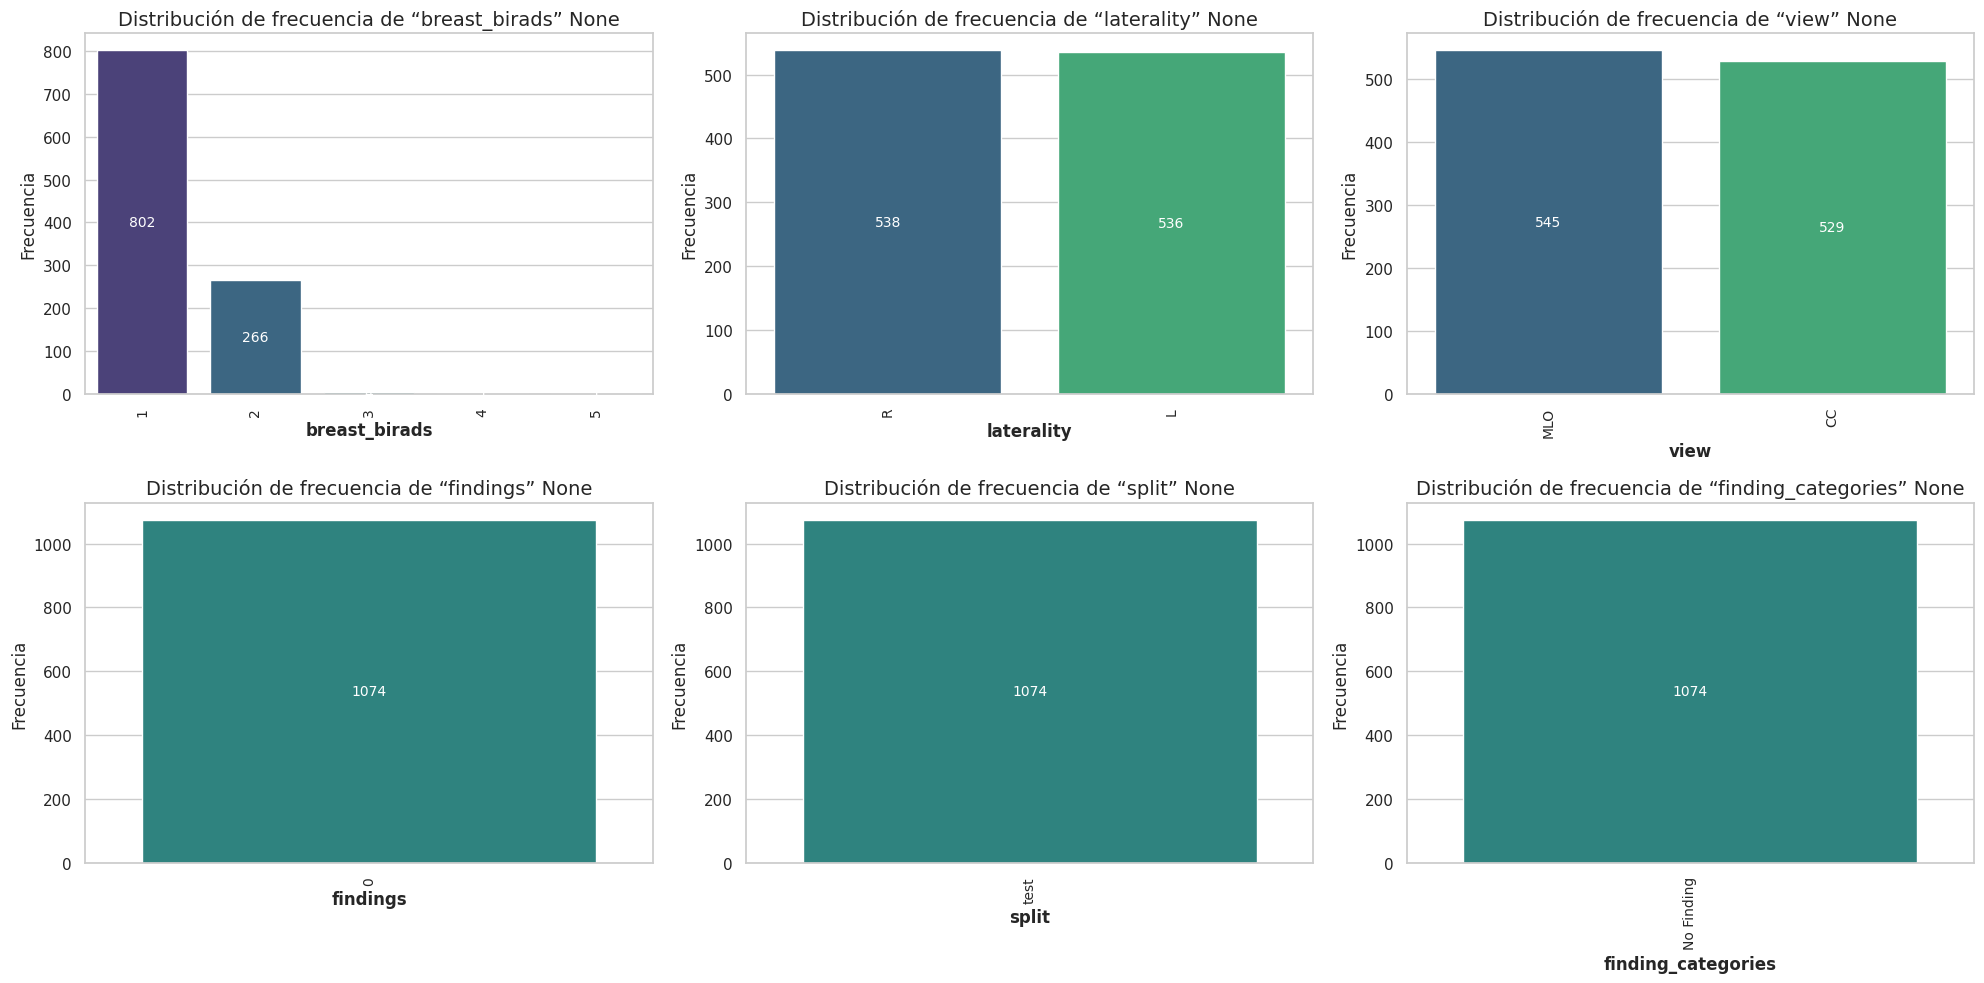

In [24]:
ds_clean_test_1_n = len(ds_clean_test_1)
ds_clean_test_0_sample = ds_clean_test_0.sample(n=3*ds_clean_test_1_n, random_state=42)
ds_clean_test_0_sample.stats()

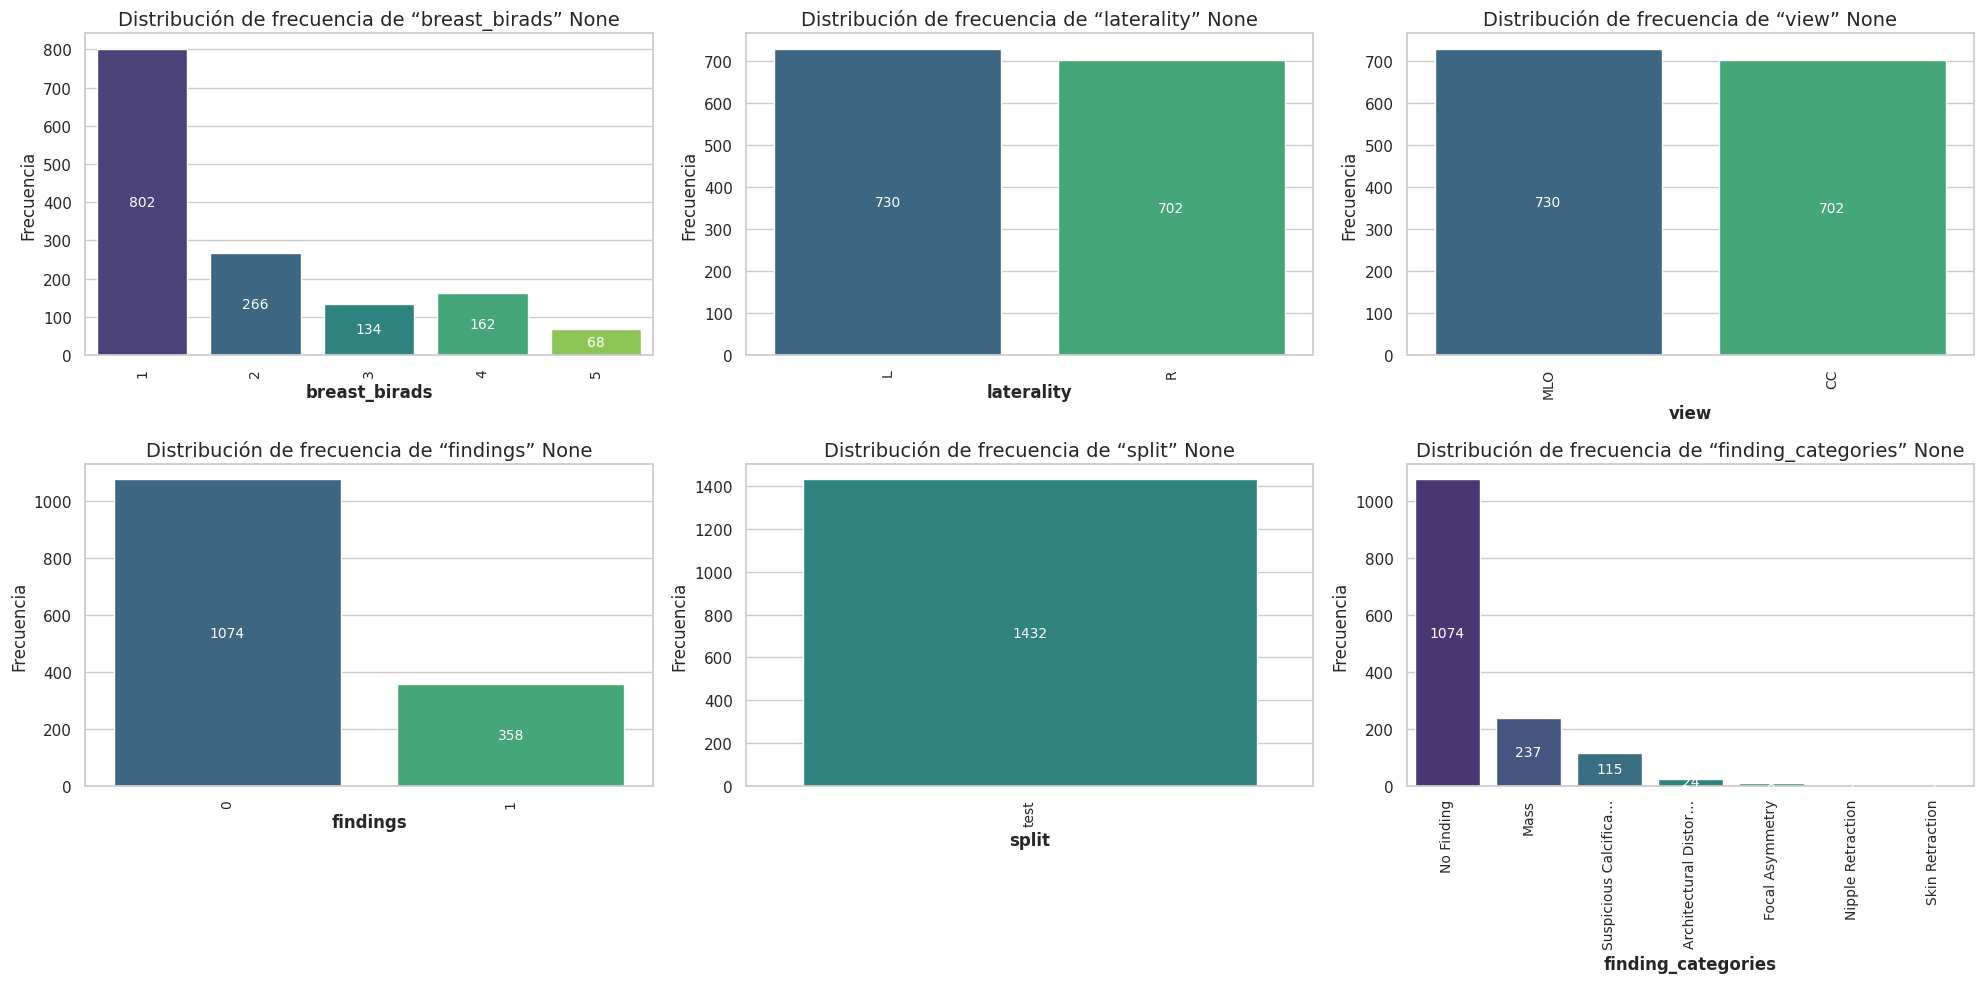

In [25]:
ds_test_ready = pd.concat([ds_clean_test_1, ds_clean_test_0_sample], ignore_index=True)
ds_test_ready.stats()

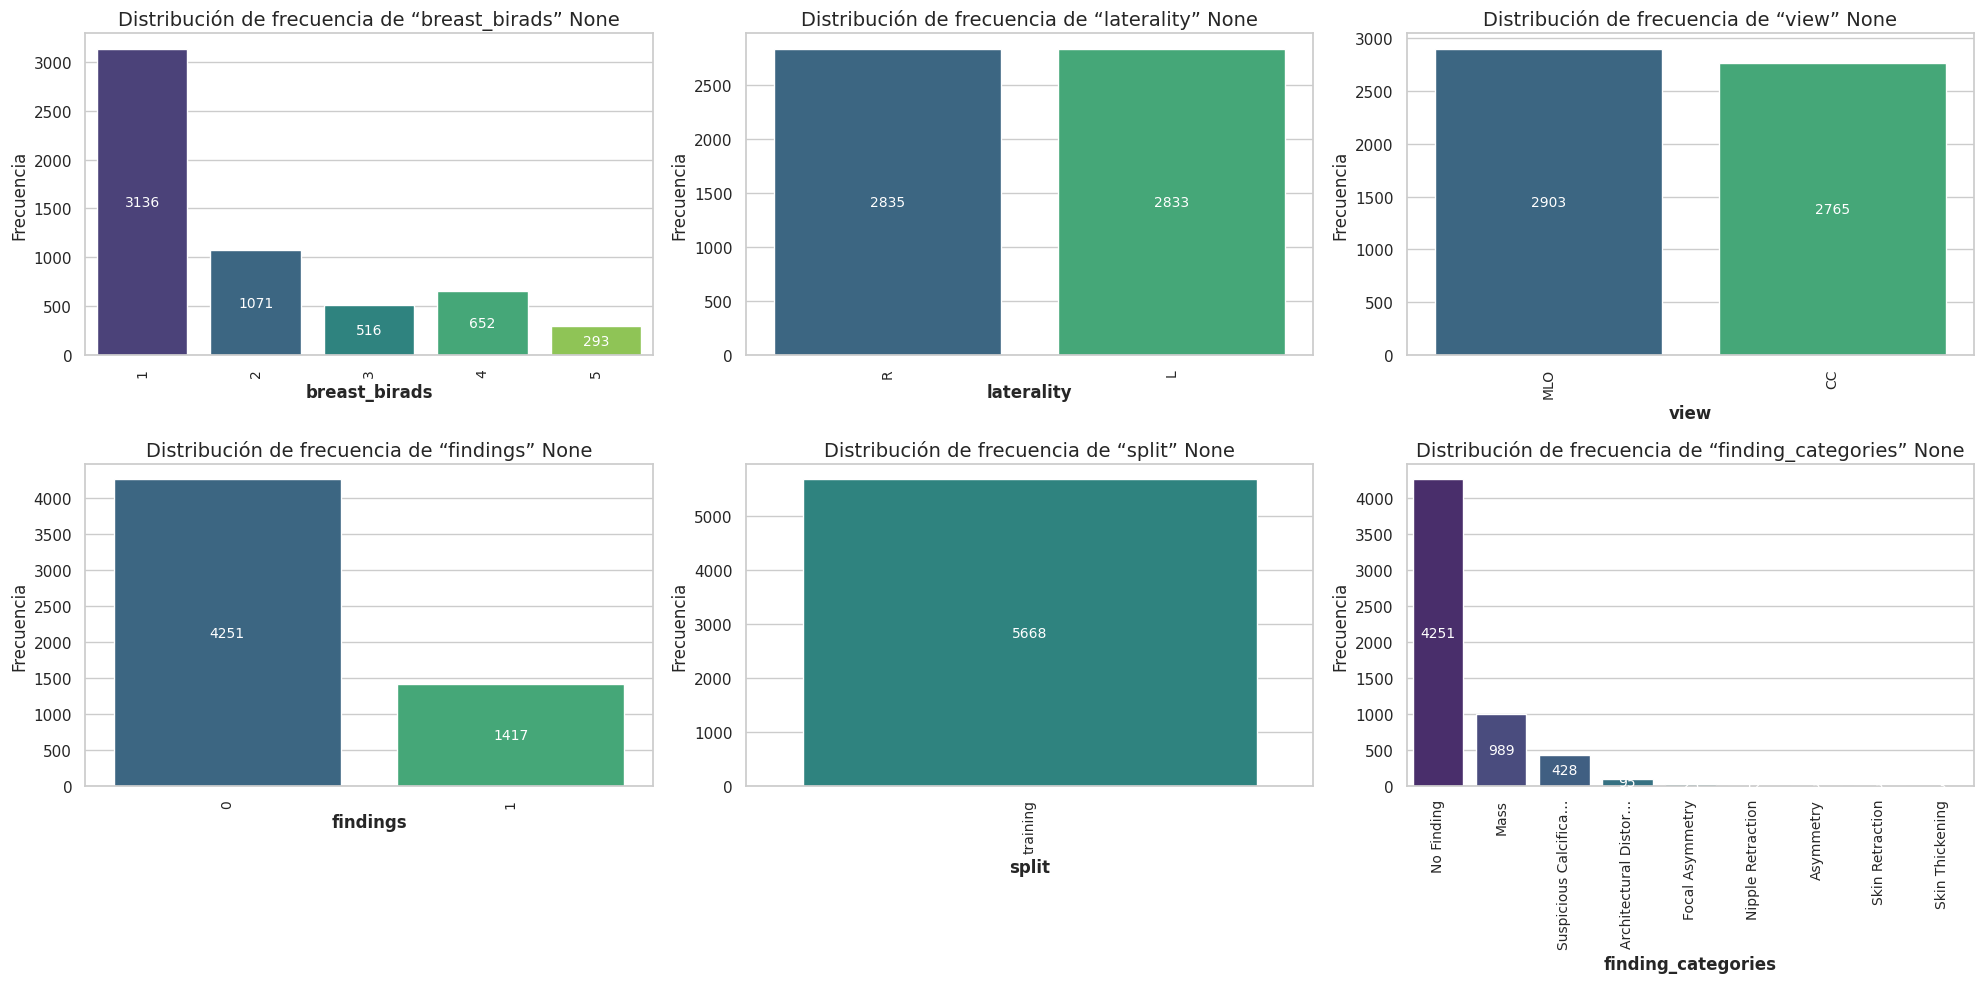

In [26]:
ds_train_ready.stats()

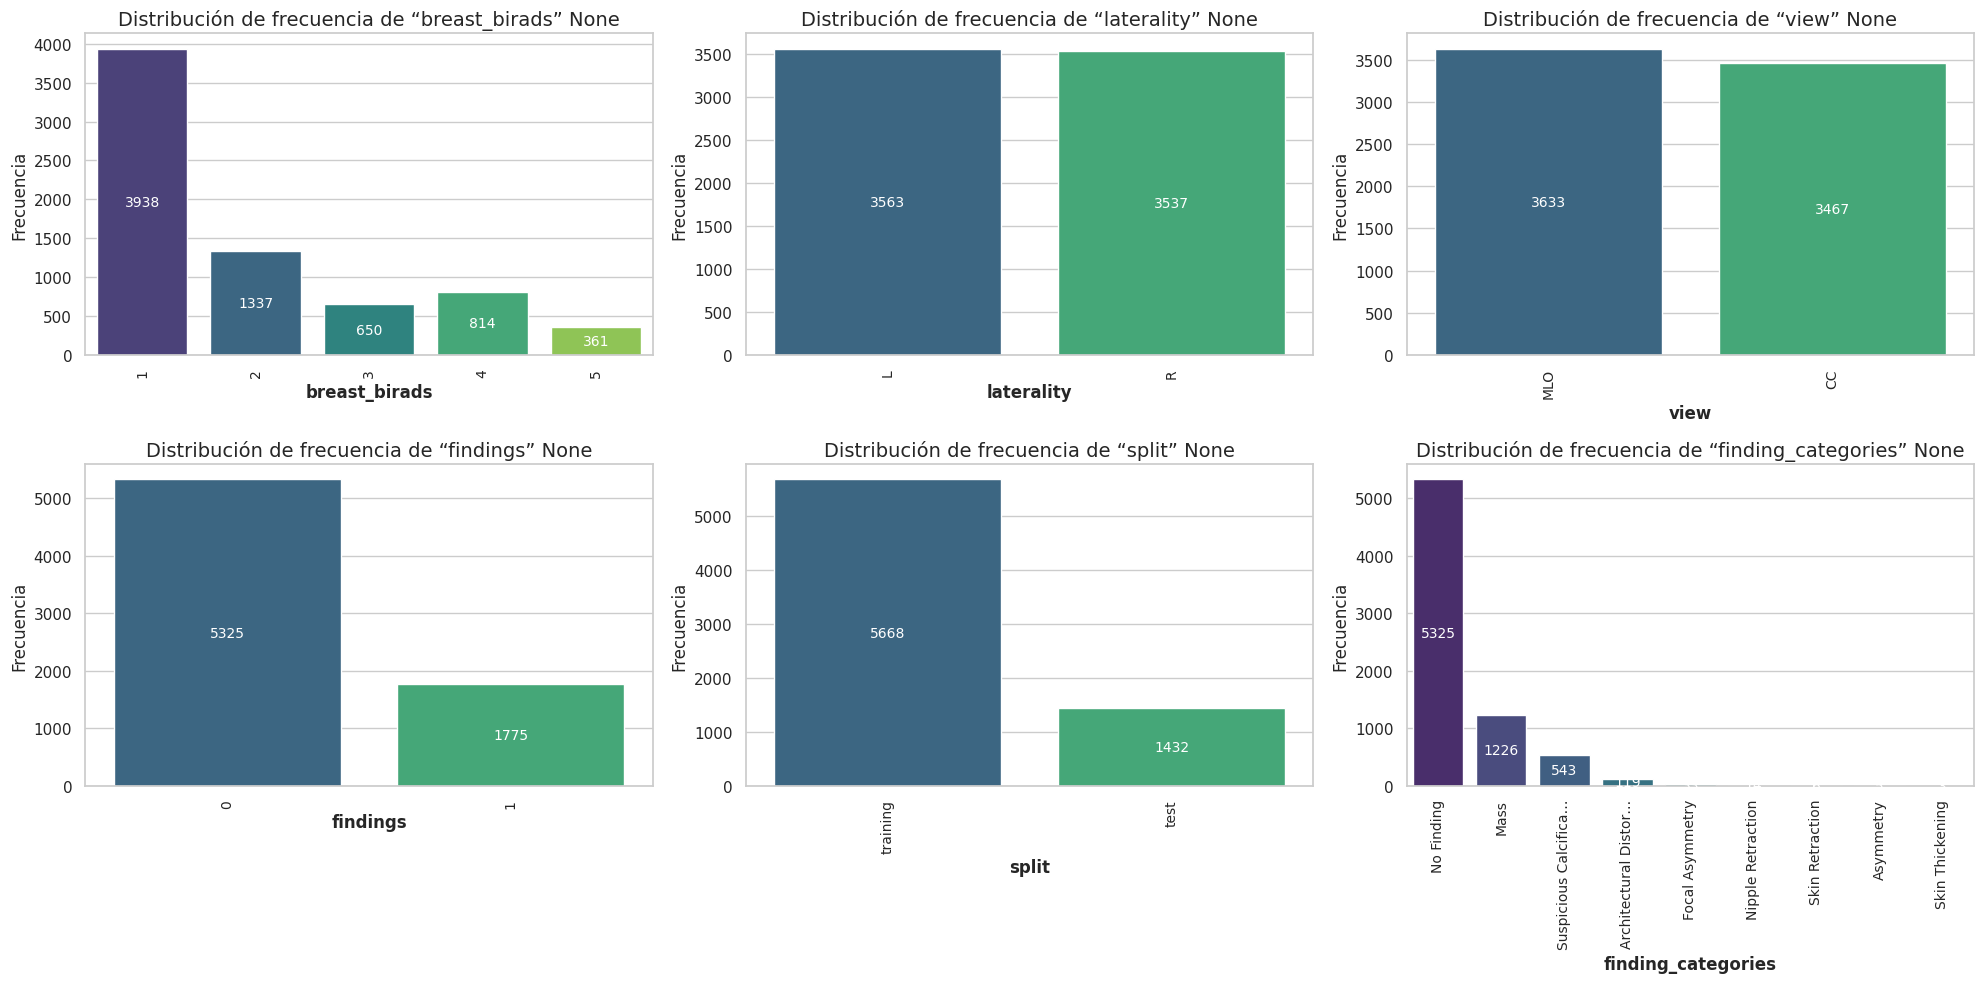

In [27]:
ds_ready = pd.concat([ds_train_ready, ds_test_ready], ignore_index=True)
ds_ready.stats()

In [28]:
# ds_ready.preload_cache()
# ds_ready.save_dump("ds_balanced.npz")

In [29]:
ds_ready.to_csv("./ds_balanced.csv", index=False)


In [37]:
ds_ready.render()

Output()

In [34]:
ds_ready

,laterality,view,breast_birads,finding_categories,finding_birads,split,xmin,ymin,xmax,ymax,path,findings
0,R,CC,4,[Mass],4,training,302.404100,985.773942,426.304376,1078.419728,utils/images_original/48575a27b7c992427041a82f...,1
1,R,MLO,4,[Mass],4,training,272.577325,743.812744,379.600308,812.095390,utils/images_original/48575a27b7c992427041a82f...,1
2,R,CC,4,[Architectural Distortion],4,training,331.732896,1078.254802,508.417507,1203.183844,utils/images_original/c3487424fee1bdd4515b72dc...,1
3,R,MLO,4,[Architectural Distortion],4,training,261.889965,1023.473918,398.125138,1091.223916,utils/images_original/c3487424fee1bdd4515b72dc...,1
4,L,CC,4,"[Nipple Retraction, Mass]",4,training,607.868846,700.577727,840.541260,951.560194,utils/images_original/7c51789da6c462e55bcb95c2...,1
...,...,...,...,...,...,...,...,...,...,...,...,...
7095,R,MLO,1,[No Finding],<NA>,test,NaN,NaN,NaN,NaN,utils/images_original/436d8bc6249a84f919004ccb...,0
7096,R,MLO,1,[No Finding],<NA>,test,NaN,NaN,NaN,NaN,utils/images_original/cfac0d62a935de7dfd7df694...,0
7097,R,MLO,2,[No Finding],<NA>,test,NaN,NaN,NaN,NaN,utils/images_original/c8a495687fe74f6aa477d0bf...,0
7098,L,MLO,1,[No Finding],<NA>,test,NaN,NaN,NaN,NaN,utils/images_original/9b7e001b3af23c0daddccb62...,0


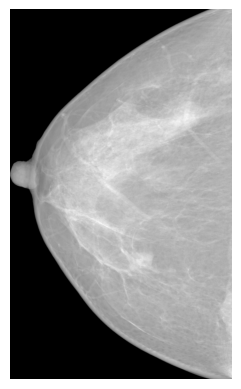

In [36]:
from PIL import Image
import matplotlib.pyplot as plt

path = ds_ready.iloc[0]["path"]
img = Image.open(path)

plt.imshow(img, cmap="gray")
plt.axis("off")
plt.show()